# **Загрузка данных**

In [ ]:
#будем использовать датасет с kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive


 0a147badb5fe245828b83cc495af6996.docx
 10108.gdoc
 1C
 360T.csv
 37_25.csv
 49_25.csv
 aclImdb_v1.tar.gz
 adult_data_reserved.csv
 adult_data_train.csv
 asset-v1_ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block@pulsar_stars_new.csv
 Bank_Personal_Loan_Modelling_train.csv
 CALS
'Colab Notebooks'
 Comp_Vision_Task_5_File_2.jpg
 DL_Task_2_test_file_107.csv
 DL_Task_2_test_file_166.csv
 DL_Task_2_test_file_44.csv
 DL_Task_2_test_file_78.csv
 example.csv
 FineReader
 fish_reserved.csv
 fish_train.csv
'HW IVANOV M.A.'
 liver_disease.csv
 MNIST_test.csv.zip
 MNIST_train.csv.zip
 neo.csv
 NIR_dataset
 persons_pics_reserved.csv
 persons_pics_train.csv
 quora.txt
 test.xlsx
 train.xlsx
 wordsim_similarity_goldstandard.txt
 words_subset.txt
 X_loadings_492.csv
 X_reduced_492.csv
 Заявление_.pdf
'Иванов М.А.pdf'
 ИНН.pdf
'Контрольная работа по ФОИ.gdoc'
'Новый документ.gdoc'
 Паспорт.pdf
 Предложения.txt
'РПТЗ Иванов М.А.'
'Русский .txt'
 Согласие.pdf
 СпецЧастьПМИ.gdoc
 СпецЧаст

In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/NIR_dataset/archive (2).zip'

extract_path = '/content/extracted_files'

if os.path.exists(zip_path):
    print("Файл найден. Извлекаем...")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print("Файлы успешно извлечены в:", extract_path)
else:
    print("Файл не найден. Проверьте путь к файлу.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Файл найден. Извлекаем...
Файлы успешно извлечены в: /content/extracted_files


In [ ]:
!ls -lh /content/extracted_files/leapGestRecog

total 40K
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 00
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 01
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 02
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 03
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 04
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 05
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 06
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 07
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 08
drwxr-xr-x 12 root root 4.0K Jan 17 18:06 09


In [ ]:
import os
import json
import copy
import time
import numpy as np
from tqdm import tqdm

In [ ]:
sorted(os.listdir('/content/extracted_files/leapGestRecog'))


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

In [ ]:
sorted(os.listdir('/content/extracted_files/leapGestRecog/00'))

['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

In [ ]:
sorted_index = sorted(os.listdir('/content/extracted_files/leapGestRecog'))
sorted_gest = sorted(os.listdir('/content/extracted_files/leapGestRecog/00'))
root = '/content/extracted_files/leapGestRecog'

In [ ]:
counter = 0
for elem in sorted(os.listdir(root)):
  print("|||||||||||begin|||||||||||")
  print(f"Индекс папки- {elem}")
  for folder_elem in sorted(os.listdir(f"{root}/{elem}")):
    num = len(os.listdir(f"{root}/{elem}/{folder_elem}"))
    print(f'Название жеста - {folder_elem} - количество жестов {num}')
    counter += num
  print("||||||||||||end||||||||||")
print(f"Общее количество элементов - {counter}")

|||||||||||begin|||||||||||
Индекс папки- 00
Название жеста - 01_palm - количество жестов 200
Название жеста - 02_l - количество жестов 200
Название жеста - 03_fist - количество жестов 200
Название жеста - 04_fist_moved - количество жестов 200
Название жеста - 05_thumb - количество жестов 200
Название жеста - 06_index - количество жестов 200
Название жеста - 07_ok - количество жестов 200
Название жеста - 08_palm_moved - количество жестов 200
Название жеста - 09_c - количество жестов 200
Название жеста - 10_down - количество жестов 200
||||||||||||end||||||||||
|||||||||||begin|||||||||||
Индекс папки- 01
Название жеста - 01_palm - количество жестов 200
Название жеста - 02_l - количество жестов 200
Название жеста - 03_fist - количество жестов 200
Название жеста - 04_fist_moved - количество жестов 200
Название жеста - 05_thumb - количество жестов 200
Название жеста - 06_index - количество жестов 200
Название жеста - 07_ok - количество жестов 200
Название жеста - 08_palm_moved - количеств

20.000 элементов, разобьем их на датасеты

In [ ]:
#создание датасетов

In [ ]:
from sklearn.metrics import f1_score
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [ ]:
counter = 0
test_size = 0.2
X_train_data = []
X_test_data = []

y_train_data = []
y_test_data = []

for elem in sorted(os.listdir(root)):
  for folder_elem in sorted(os.listdir(f"{root}/{elem}")):
      image_all_path = os.listdir(f"{root}/{elem}/{folder_elem}")
      trashold = int((1 - test_size) * len(image_all_path))
      for image in image_all_path[:trashold]:
        X_train_data.append(f"{root}/{elem}/{folder_elem}/{image}")
        y_train_data.append(int(folder_elem[:2]))
      for image in image_all_path[trashold:]:
        X_test_data.append(f"{root}/{elem}/{folder_elem}/{image}")
        y_test_data.append(int(folder_elem[:2]))

In [ ]:
print(len(X_train_data))
print(len(X_test_data))

16000
4000


In [ ]:
import torchvision.transforms as tt

class Dataset_gest(Dataset):
    def __init__(self, path, gest, size=(128,128), train=True):
        self.path = path
        self.gest = gest
        if train:
            self.transform = tt.Compose([
                tt.ToTensor(),
                tt.Resize(size, antialias=False),
                tt.RandomHorizontalFlip()
            ])
        else:
            self.transform = tt.Compose([
                tt.ToTensor(),
                tt.Resize(size, antialias=False)
            ])

    def __getitem__(self, index):
        image = plt.imread(self.path[index])
        image = self.transform(image)
        gest = self.gest[index] - 1
        return image, gest

    def __len__(self):
        return len(self.gest)

# Пример инициализации
train_dataset = Dataset_gest(X_train_data, y_train_data, size=(128, 128), train=True)
test_dataset = Dataset_gest(X_test_data, y_test_data, size=(128, 128), train=False)


In [ ]:
# Указание значения по умолчанию для `size` и `train`, если они не нужны
train_dataset = Dataset_gest(X_train_data, y_train_data, size=(128, 128), train=True)
test_dataset = Dataset_gest(X_test_data, y_test_data, size=(128, 128), train=False)
batch = 16
train_loader = DataLoader(train_dataset, batch, shuffle=True)
test_loader= DataLoader(test_dataset, batch, shuffle=False)

In [ ]:
batch = 16
train_loader = DataLoader(train_dataset, batch, shuffle=True)
test_loader= DataLoader(test_dataset, batch, shuffle=False)

In [ ]:
def show_batch(loader, batch_size):
    images, labels = next(iter(loader))
    grid_img = make_grid(images, nrow=int(np.sqrt(batch_size)))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(grid_img.permute(1, 2, 0))  # Приведение к [height, width, channels] для plt.imshow
    ax.axis('off')  # Убираем оси для чистоты изображения
    plt.show()


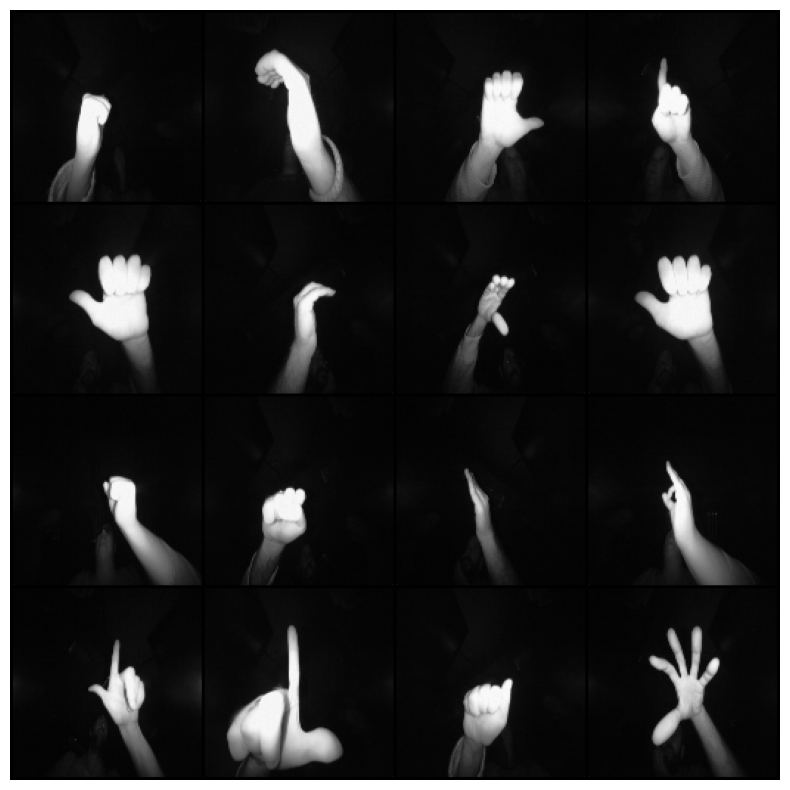

In [ ]:
show_batch(train_loader, 16)

# **Обучение модели**

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 52.2 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp

In [ ]:
%%time

# Инициализация модели для распознавания рук
hands = mp.solutions.hands.Hands(
    static_image_mode=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    max_num_hands=1  # Ограничение на 1 руку, так как на каждой фотографии только один жест
)

# Объединение данных для тренировки и теста
data = X_train_data + X_test_data
labels = y_train_data + y_test_data

data_landmarks = []  # Список для хранения ландмарков
labels_landmarks = []  # Список для хранения меток жестов

# Обработка всех изображений
for i in tqdm(range(len(labels))):
    # Чтение изображения
    image = cv2.imread(data[i])

    # Обработка изображения с помощью mediapipe
    results = hands.process(image)

    # Если найдены ландмарки для руки
    if results.multi_hand_landmarks:
        landmarks = []

        # Извлечение координат ландмарков руки
        for landmark in results.multi_hand_landmarks[0].landmark:
            landmarks.append([landmark.x, landmark.y])

        # Нормализация ландмарков (min-max нормализация)
        landmarks = np.array(landmarks)
        landmarks[:, 0] -= np.min(landmarks[:, 0])  # Нормализация по оси X
        landmarks[:, 1] -= np.min(landmarks[:, 1])  # Нормализация по оси Y
        landmarks[:, 0] /= np.max(landmarks[:, 0])  # Масштабирование по оси X
        landmarks[:, 1] /= np.max(landmarks[:, 1])  # Масштабирование по оси Y

        # Добавление нормализованных данных и метки жеста в списки
        data_landmarks.append(landmarks)
        labels_landmarks.append(labels[i])


100%|██████████| 20000/20000 [06:45<00:00, 49.29it/s]

CPU times: user 6min 10s, sys: 9.58 s, total: 6min 20s
Wall time: 6min 45s


In [ ]:
len(labels_landmarks)

8251

In [ ]:
classes_data = sorted(os.listdir(f'{root}/00'))

In [ ]:
count_labels_landmarks = {}
for i in range(1,11):
    count_labels_landmarks[classes_data[i-1]] = labels_landmarks.count(i)
count_labels_landmarks

{'01_palm': 1730,
 '02_l': 1049,
 '03_fist': 442,
 '04_fist_moved': 128,
 '05_thumb': 664,
 '06_index': 621,
 '07_ok': 1623,
 '08_palm_moved': 208,
 '09_c': 530,
 '10_down': 1256}

In [ ]:
class_count = np.array(list(count_labels_landmarks.values())).astype(float)
class_weights = max(class_count)
class_weights /= class_count
class_weights

array([ 1.        ,  1.6491897 ,  3.91402715, 13.515625  ,  2.60542169,
        2.78582931,  1.0659273 ,  8.31730769,  3.26415094,  1.37738854])

In [ ]:
test_size = 0.2

train_data_landmarks = []
train_labels_landmarks = []
test_data_landmarks = []
test_labels_landmarks = []

data_landmarks = np.array(data_landmarks)
labels_landmarks = np.array(labels_landmarks)

for i in range(1,11):
    mask = (labels_landmarks==i)
    trashold = int((1-test_size)*sum(mask))
    train_data_landmarks.extend(data_landmarks[mask][:trashold])
    train_labels_landmarks.extend([i]*trashold)
    test_data_landmarks.extend(data_landmarks[mask][trashold:])
    test_labels_landmarks.extend([i]*(sum(mask)-trashold))

In [ ]:
class Dataset_landmarks_classification(Dataset):
    def __init__(self, data_landmarks, labels_landmarks):

        self.data_landmarks = data_landmarks
        self.labels_landmarks = labels_landmarks

    def __getitem__(self, index):
        data = torch.FloatTensor(self.data_landmarks[index])
        label = self.labels_landmarks[index] - 1

        return data, label

    def __len__(self):
        return len(self.labels_landmarks)

In [ ]:
train_dataset = Dataset_landmarks_classification(train_data_landmarks, train_labels_landmarks)
test_dataset = Dataset_landmarks_classification(test_data_landmarks, test_labels_landmarks)

train_loader = DataLoader(train_dataset, batch, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch, shuffle=True)

In [ ]:
import torch
import torch.nn as nn

class Net_landmarks_classification(nn.Module):
    def __init__(self, in_channel, length, hidden_dim, num_classes, dropout):
        super().__init__()
        self.linear_1 = nn.Linear(in_channel*length, hidden_dim)
        self.bn_1 = nn.BatchNorm1d(hidden_dim)
        self.linear_2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.bn_2 = nn.BatchNorm1d(hidden_dim // 2)
        self.linear_3 = nn.Linear(hidden_dim // 2, num_classes)

        self.relu = nn.ReLU()
        self.dp = nn.Dropout(dropout)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)

        output = self.linear_1(x)
        output = self.bn_1(output)
        output = self.relu(output)
        output = self.dp(output)

        output = self.linear_2(output)
        output = self.bn_2(output)
        output = self.relu(output)
        output = self.dp(output)

        output = self.linear_3(output)
        return output

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
model = Net_landmarks_classification(data_landmarks.shape[2], data_landmarks.shape[1], 512, len(classes_data), 0.2)
model = model.to(device)
model.train()

Net_landmarks_classification(
  (linear_1): Linear(in_features=42, out_features=512, bias=True)
  (bn_1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_2): Linear(in_features=512, out_features=256, bias=True)
  (bn_2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_3): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
  (dp): Dropout(p=0.2, inplace=False)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(weight=torch.FloatTensor(class_weights).to(device), reduction='mean')

In [ ]:
%%time

epochs = 50

train_list_loss = []
test_list_loss = []
train_list_acc = []
test_list_acc = []
train_list_f1 = []
test_list_f1 = []

for epoch_num in range(epochs):
    train_loss = 0
    test_loss = 0
    train_acc = 0
    test_acc = 0
    train_f1 = 0
    test_f1 = 0

    model.train()
    for landmarks, labels in tqdm(train_loader):
        landmarks = landmarks.to(device)
        labels = labels.to(device)

        output = model(landmarks)

        loss = criterion(output, labels)
        train_loss += loss.item()

        train_acc += (output.argmax(dim=1) == labels).sum().item() / len(labels)

        train_f1 += f1_score(labels.detach().cpu().numpy().astype(int),
                            (output.detach().cpu().numpy().argmax(1)).astype(int), average='weighted')

        model.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    for landmarks, labels in test_loader:
        landmarks = landmarks.to(device)
        labels = labels.to(device)

        output = model(landmarks)

        loss = criterion(output, labels)
        test_loss += loss.item()

        test_acc += (output.argmax(dim=1) == labels).sum().item() / len(labels)

        test_f1 += f1_score(labels.detach().cpu().numpy().astype(int),
                            (output.detach().cpu().numpy().argmax(1)).astype(int), average='weighted')

    train_list_loss.append(round(train_loss / len(train_loader), 6))
    test_list_loss.append(round(test_loss / len(test_loader), 6))
    train_list_acc.append(round(train_acc / len(train_loader), 6))
    test_list_acc.append(round(test_acc / len(test_loader), 6))
    train_list_f1.append(round(train_f1 / len(train_loader), 6))
    test_list_f1.append(round(test_f1 / len(test_loader), 6))

    print(
        f"Epochs: {epoch_num + 1} | Train Loss: {train_loss / len(train_loader): .6f} \
        | Train Accuracy: {train_acc / len(train_loader): .6f} \
        | Train_f1: {train_f1 / len(train_loader): .6f}" + "\n" + " "*len(str(epoch_num + 1)) +
f"         | Test Loss: {test_loss / len(test_loader): .6f} \
         | Test Accuracy: {test_acc / len(test_loader): .6f} \
         | Test_f1: {test_f1 / len(test_loader): .6f}")

    # Динамически меняем lr в зависимости от ошибки
    opt_loss = round(train_loss / len(train_loader), 6)
    if opt_loss < 0.02:
      optimizer.param_groups[0]['lr'] = 10**(-4)
    else:
      optimizer.param_groups[0]['lr'] = 10**(-3)

100%|██████████| 412/412 [00:03<00:00, 107.46it/s]


Epochs: 1 | Train Loss:  0.389061         | Train Accuracy:  0.887743         | Train_f1:  0.900383
          | Test Loss:  0.164014          | Test Accuracy:  0.951923          | Test_f1:  0.955173


100%|██████████| 412/412 [00:04<00:00, 83.80it/s]


Epochs: 2 | Train Loss:  0.182184         | Train Accuracy:  0.944782         | Train_f1:  0.953224
          | Test Loss:  0.099057          | Test Accuracy:  0.971755          | Test_f1:  0.973273


100%|██████████| 412/412 [00:02<00:00, 138.98it/s]


Epochs: 3 | Train Loss:  0.123439         | Train Accuracy:  0.961317         | Train_f1:  0.966540
          | Test Loss:  0.094496          | Test Accuracy:  0.968149          | Test_f1:  0.968114


100%|██████████| 412/412 [00:01<00:00, 238.00it/s]


Epochs: 4 | Train Loss:  0.115487         | Train Accuracy:  0.961317         | Train_f1:  0.967474
          | Test Loss:  0.105657          | Test Accuracy:  0.966346          | Test_f1:  0.969543


100%|██████████| 412/412 [00:01<00:00, 248.51it/s]


Epochs: 5 | Train Loss:  0.090084         | Train Accuracy:  0.970874         | Train_f1:  0.975361
          | Test Loss:  0.080869          | Test Accuracy:  0.974159          | Test_f1:  0.974429


100%|██████████| 412/412 [00:01<00:00, 240.70it/s]


Epochs: 6 | Train Loss:  0.087989         | Train Accuracy:  0.966171         | Train_f1:  0.971862
          | Test Loss:  0.075152          | Test Accuracy:  0.980369          | Test_f1:  0.982203


100%|██████████| 412/412 [00:01<00:00, 237.46it/s]


Epochs: 7 | Train Loss:  0.075995         | Train Accuracy:  0.974515         | Train_f1:  0.978624
          | Test Loss:  0.097122          | Test Accuracy:  0.977965          | Test_f1:  0.977247


100%|██████████| 412/412 [00:02<00:00, 199.93it/s]


Epochs: 8 | Train Loss:  0.075896         | Train Accuracy:  0.973604         | Train_f1:  0.978523
          | Test Loss:  0.071997          | Test Accuracy:  0.972957          | Test_f1:  0.975234


100%|██████████| 412/412 [00:02<00:00, 173.66it/s]


Epochs: 9 | Train Loss:  0.067574         | Train Accuracy:  0.976032         | Train_f1:  0.980282
          | Test Loss:  0.082772          | Test Accuracy:  0.981370          | Test_f1:  0.981546


100%|██████████| 412/412 [00:01<00:00, 250.37it/s]


Epochs: 10 | Train Loss:  0.052619         | Train Accuracy:  0.980734         | Train_f1:  0.983914
           | Test Loss:  0.082275          | Test Accuracy:  0.978365          | Test_f1:  0.979705


100%|██████████| 412/412 [00:01<00:00, 236.32it/s]


Epochs: 11 | Train Loss:  0.052738         | Train Accuracy:  0.978307         | Train_f1:  0.981499
           | Test Loss:  0.071100          | Test Accuracy:  0.983173          | Test_f1:  0.983877


100%|██████████| 412/412 [00:01<00:00, 243.50it/s]


Epochs: 12 | Train Loss:  0.047125         | Train Accuracy:  0.981038         | Train_f1:  0.983372
           | Test Loss:  0.074605          | Test Accuracy:  0.980168          | Test_f1:  0.980885


100%|██████████| 412/412 [00:01<00:00, 243.99it/s]


Epochs: 13 | Train Loss:  0.060617         | Train Accuracy:  0.979217         | Train_f1:  0.982414
           | Test Loss:  0.087303          | Test Accuracy:  0.980168          | Test_f1:  0.981383


100%|██████████| 412/412 [00:01<00:00, 243.24it/s]


Epochs: 14 | Train Loss:  0.051347         | Train Accuracy:  0.981189         | Train_f1:  0.984483
           | Test Loss:  0.135158          | Test Accuracy:  0.980168          | Test_f1:  0.980228


100%|██████████| 412/412 [00:02<00:00, 174.47it/s]


Epochs: 15 | Train Loss:  0.050745         | Train Accuracy:  0.981948         | Train_f1:  0.985083
           | Test Loss:  0.072671          | Test Accuracy:  0.978966          | Test_f1:  0.979762


100%|██████████| 412/412 [00:02<00:00, 182.03it/s]


Epochs: 16 | Train Loss:  0.079186         | Train Accuracy:  0.975576         | Train_f1:  0.980251
           | Test Loss:  0.075200          | Test Accuracy:  0.981571          | Test_f1:  0.982178


100%|██████████| 412/412 [00:01<00:00, 244.50it/s]


Epochs: 17 | Train Loss:  0.055148         | Train Accuracy:  0.981493         | Train_f1:  0.985221
           | Test Loss:  0.109893          | Test Accuracy:  0.975962          | Test_f1:  0.976140


100%|██████████| 412/412 [00:01<00:00, 249.75it/s]


Epochs: 18 | Train Loss:  0.049789         | Train Accuracy:  0.982706         | Train_f1:  0.985960
           | Test Loss:  0.083101          | Test Accuracy:  0.982572          | Test_f1:  0.982302


100%|██████████| 412/412 [00:01<00:00, 243.32it/s]


Epochs: 19 | Train Loss:  0.055626         | Train Accuracy:  0.981796         | Train_f1:  0.985301
           | Test Loss:  0.089422          | Test Accuracy:  0.980369          | Test_f1:  0.979885


100%|██████████| 412/412 [00:01<00:00, 243.85it/s]


Epochs: 20 | Train Loss:  0.046309         | Train Accuracy:  0.983617         | Train_f1:  0.986939
           | Test Loss:  0.079307          | Test Accuracy:  0.985577          | Test_f1:  0.985803


100%|██████████| 412/412 [00:01<00:00, 229.71it/s]


Epochs: 21 | Train Loss:  0.043680         | Train Accuracy:  0.983920         | Train_f1:  0.987454
           | Test Loss:  0.070965          | Test Accuracy:  0.986779          | Test_f1:  0.985984


100%|██████████| 412/412 [00:02<00:00, 184.96it/s]


Epochs: 22 | Train Loss:  0.039756         | Train Accuracy:  0.985437         | Train_f1:  0.987532
           | Test Loss:  0.087972          | Test Accuracy:  0.980168          | Test_f1:  0.979821


100%|██████████| 412/412 [00:02<00:00, 198.51it/s]


Epochs: 23 | Train Loss:  0.042357         | Train Accuracy:  0.982100         | Train_f1:  0.985208
           | Test Loss:  0.066999          | Test Accuracy:  0.985577          | Test_f1:  0.985326


100%|██████████| 412/412 [00:01<00:00, 248.73it/s]


Epochs: 24 | Train Loss:  0.037599         | Train Accuracy:  0.986347         | Train_f1:  0.988719
           | Test Loss:  0.053291          | Test Accuracy:  0.985577          | Test_f1:  0.985488


100%|██████████| 412/412 [00:01<00:00, 241.61it/s]


Epochs: 25 | Train Loss:  0.041687         | Train Accuracy:  0.984830         | Train_f1:  0.987760
           | Test Loss:  0.058844          | Test Accuracy:  0.989784          | Test_f1:  0.988965


100%|██████████| 412/412 [00:01<00:00, 243.43it/s]


Epochs: 26 | Train Loss:  0.042175         | Train Accuracy:  0.984223         | Train_f1:  0.987176
           | Test Loss:  0.077085          | Test Accuracy:  0.983173          | Test_f1:  0.984401


100%|██████████| 412/412 [00:01<00:00, 249.44it/s]


Epochs: 27 | Train Loss:  0.029298         | Train Accuracy:  0.989078         | Train_f1:  0.990944
           | Test Loss:  0.054123          | Test Accuracy:  0.986779          | Test_f1:  0.986331


100%|██████████| 412/412 [00:01<00:00, 227.38it/s]


Epochs: 28 | Train Loss:  0.029862         | Train Accuracy:  0.987409         | Train_f1:  0.988951
           | Test Loss:  0.081338          | Test Accuracy:  0.981370          | Test_f1:  0.982957


100%|██████████| 412/412 [00:02<00:00, 183.77it/s]


Epochs: 29 | Train Loss:  0.037315         | Train Accuracy:  0.986195         | Train_f1:  0.988576
           | Test Loss:  0.059718          | Test Accuracy:  0.985777          | Test_f1:  0.985776


100%|██████████| 412/412 [00:02<00:00, 205.15it/s]


Epochs: 30 | Train Loss:  0.025067         | Train Accuracy:  0.989988         | Train_f1:  0.991946
           | Test Loss:  0.073304          | Test Accuracy:  0.985577          | Test_f1:  0.986548


100%|██████████| 412/412 [00:01<00:00, 242.68it/s]


Epochs: 31 | Train Loss:  0.033570         | Train Accuracy:  0.988016         | Train_f1:  0.989833
           | Test Loss:  0.074771          | Test Accuracy:  0.983173          | Test_f1:  0.983852


100%|██████████| 412/412 [00:01<00:00, 245.63it/s]


Epochs: 32 | Train Loss:  0.036659         | Train Accuracy:  0.985892         | Train_f1:  0.987959
           | Test Loss:  0.061671          | Test Accuracy:  0.989784          | Test_f1:  0.989435


100%|██████████| 412/412 [00:01<00:00, 245.04it/s]


Epochs: 33 | Train Loss:  0.031770         | Train Accuracy:  0.989078         | Train_f1:  0.991285
           | Test Loss:  0.101012          | Test Accuracy:  0.982772          | Test_f1:  0.984462


100%|██████████| 412/412 [00:01<00:00, 242.16it/s]


Epochs: 34 | Train Loss:  0.035046         | Train Accuracy:  0.988319         | Train_f1:  0.990484
           | Test Loss:  0.075155          | Test Accuracy:  0.981971          | Test_f1:  0.981249


100%|██████████| 412/412 [00:02<00:00, 201.40it/s]


Epochs: 35 | Train Loss:  0.027733         | Train Accuracy:  0.989078         | Train_f1:  0.990710
           | Test Loss:  0.074685          | Test Accuracy:  0.987981          | Test_f1:  0.987939


100%|██████████| 412/412 [00:02<00:00, 178.75it/s]


Epochs: 36 | Train Loss:  0.025310         | Train Accuracy:  0.991505         | Train_f1:  0.992777
           | Test Loss:  0.082384          | Test Accuracy:  0.986178          | Test_f1:  0.986107


100%|██████████| 412/412 [00:01<00:00, 225.64it/s]


Epochs: 37 | Train Loss:  0.036584         | Train Accuracy:  0.987409         | Train_f1:  0.989875
           | Test Loss:  0.068000          | Test Accuracy:  0.985577          | Test_f1:  0.985537


100%|██████████| 412/412 [00:01<00:00, 247.92it/s]


Epochs: 38 | Train Loss:  0.032836         | Train Accuracy:  0.988774         | Train_f1:  0.990473
           | Test Loss:  0.080418          | Test Accuracy:  0.988582          | Test_f1:  0.987973


100%|██████████| 412/412 [00:01<00:00, 241.60it/s]


Epochs: 39 | Train Loss:  0.028908         | Train Accuracy:  0.989836         | Train_f1:  0.991856
           | Test Loss:  0.070115          | Test Accuracy:  0.987380          | Test_f1:  0.987164


100%|██████████| 412/412 [00:01<00:00, 248.43it/s]


Epochs: 40 | Train Loss:  0.022068         | Train Accuracy:  0.991505         | Train_f1:  0.993053
           | Test Loss:  0.085751          | Test Accuracy:  0.984375          | Test_f1:  0.984690


100%|██████████| 412/412 [00:01<00:00, 243.78it/s]


Epochs: 41 | Train Loss:  0.027263         | Train Accuracy:  0.990291         | Train_f1:  0.991887
           | Test Loss:  0.101345          | Test Accuracy:  0.983173          | Test_f1:  0.981785


100%|██████████| 412/412 [00:02<00:00, 196.97it/s]


Epochs: 42 | Train Loss:  0.029023         | Train Accuracy:  0.991808         | Train_f1:  0.993069
           | Test Loss:  0.072082          | Test Accuracy:  0.984375          | Test_f1:  0.986124


100%|██████████| 412/412 [00:02<00:00, 179.44it/s]


Epochs: 43 | Train Loss:  0.028633         | Train Accuracy:  0.989988         | Train_f1:  0.991863
           | Test Loss:  0.091115          | Test Accuracy:  0.987380          | Test_f1:  0.987015


100%|██████████| 412/412 [00:01<00:00, 248.77it/s]


Epochs: 44 | Train Loss:  0.022912         | Train Accuracy:  0.990746         | Train_f1:  0.992326
           | Test Loss:  0.069086          | Test Accuracy:  0.991587          | Test_f1:  0.990655


100%|██████████| 412/412 [00:01<00:00, 248.31it/s]


Epochs: 45 | Train Loss:  0.027512         | Train Accuracy:  0.989988         | Train_f1:  0.991481
           | Test Loss:  0.097604          | Test Accuracy:  0.986178          | Test_f1:  0.986333


100%|██████████| 412/412 [00:01<00:00, 247.21it/s]


Epochs: 46 | Train Loss:  0.027335         | Train Accuracy:  0.989988         | Train_f1:  0.991642
           | Test Loss:  0.103060          | Test Accuracy:  0.989183          | Test_f1:  0.988168


100%|██████████| 412/412 [00:01<00:00, 243.61it/s]


Epochs: 47 | Train Loss:  0.029629         | Train Accuracy:  0.989533         | Train_f1:  0.991429
           | Test Loss:  0.075808          | Test Accuracy:  0.986779          | Test_f1:  0.987313


100%|██████████| 412/412 [00:01<00:00, 247.35it/s]


Epochs: 48 | Train Loss:  0.025242         | Train Accuracy:  0.989836         | Train_f1:  0.991060
           | Test Loss:  0.072724          | Test Accuracy:  0.986178          | Test_f1:  0.988034


100%|██████████| 412/412 [00:02<00:00, 186.03it/s]


Epochs: 49 | Train Loss:  0.020709         | Train Accuracy:  0.991657         | Train_f1:  0.993109
           | Test Loss:  0.062593          | Test Accuracy:  0.991587          | Test_f1:  0.991128


100%|██████████| 412/412 [00:02<00:00, 180.45it/s]


Epochs: 50 | Train Loss:  0.027440         | Train Accuracy:  0.989836         | Train_f1:  0.991563
           | Test Loss:  0.086166          | Test Accuracy:  0.984375          | Test_f1:  0.984222
CPU times: user 1min 45s, sys: 1.52 s, total: 1min 46s
Wall time: 1min 55s


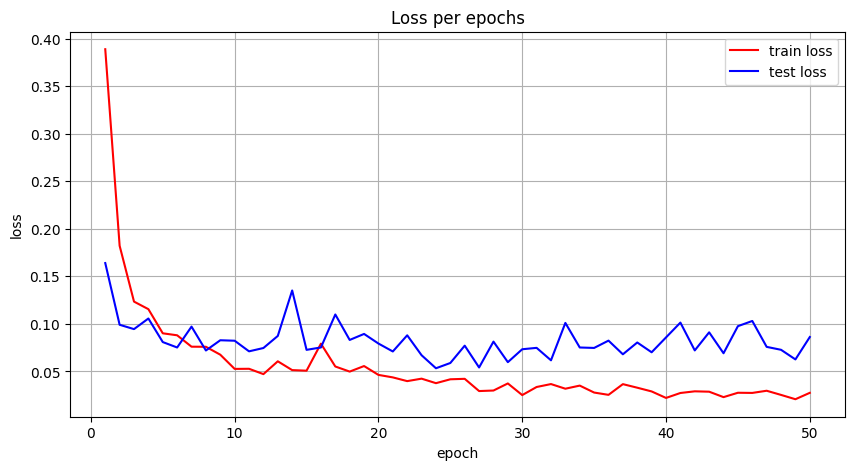

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(1, epochs+1)), train_list_loss, 'r', label='train loss')
plt.plot(list(range(1, epochs+1)), test_list_loss, 'b', label='test loss')
plt.title('Loss per epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

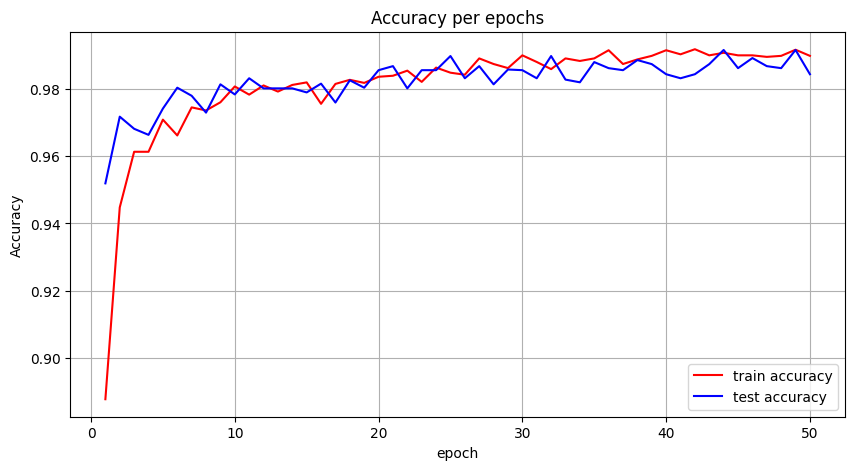

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(1, epochs+1)), train_list_acc, 'r', label='train accuracy')
plt.plot(list(range(1, epochs+1)), test_list_acc, 'b', label='test accuracy')
plt.title('Accuracy per epochs')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

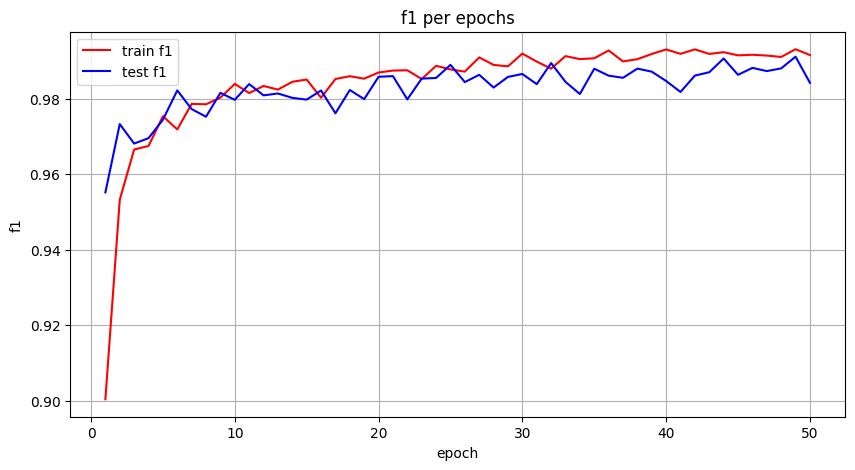

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(1, epochs+1)), train_list_f1, 'r', label='train f1')
plt.plot(list(range(1, epochs+1)), test_list_f1, 'b', label='test f1')
plt.title('f1 per epochs')
plt.xlabel('epoch')
plt.ylabel('f1')
plt.legend()
plt.grid()
plt.show()

In [ ]:
torch.save(model, 'classification_model_landmarks.pth')

Проверка модели

In [ ]:
import torch

# Загрузка модели
model = torch.load('classification_model_landmarks.pth')
model.eval()  # Перевод модели в режим инференса
print(model)


Net_landmarks_classification(
  (linear_1): Linear(in_features=42, out_features=512, bias=True)
  (bn_1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_2): Linear(in_features=512, out_features=256, bias=True)
  (bn_2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_3): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
  (dp): Dropout(p=0.2, inplace=False)
)


<ipython-input-49-d1711988c912>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('classification_model_landmarks.pth')


In [ ]:
from sklearn.metrics import f1_score

# Оценка модели на тестовом даталоадере
test_loss = 0
test_acc = 0
test_f1 = 0

criterion = torch.nn.CrossEntropyLoss()  # Убедитесь, что это та же функция потерь, которая использовалась при обучении

model.eval()  # Перевод модели в режим инференса
with torch.no_grad():  # Отключение вычислений градиентов
    for landmarks, labels in test_loader:
        landmarks = landmarks.to(device)
        labels = labels.to(device)

        output = model(landmarks)

        # Подсчёт функции потерь
        loss = criterion(output, labels)
        test_loss += loss.item()

        # Подсчёт точности
        test_acc += (output.argmax(dim=1) == labels).sum().item() / len(labels)

        # Подсчёт F1-метрики
        test_f1 += f1_score(
            labels.detach().cpu().numpy().astype(int),
            (output.detach().cpu().numpy().argmax(1)).astype(int),
            average='weighted'
        )

# Средние значения для всего тестового набора
test_loss /= len(test_loader)
test_acc /= len(test_loader)
test_f1 /= len(test_loader)

print(f"Test Loss: {test_loss:.6f} | Test Accuracy: {test_acc:.6f} | Test F1: {test_f1:.6f}")


Test Loss: 0.055154 | Test Accuracy: 0.984375 | Test F1: 0.983618


In [ ]:
#predict
import torch
import torchvision.transforms as tt
from PIL import Image
import numpy as np

def predict_image(image_path, model, device):
    # 1. Подготовка трансформаций (таких же как для обучения)
    transform = tt.Compose([
        tt.Resize((128, 128)),  # Размер изображения должен быть таким же, как на тренировке
        tt.ToTensor(),
    ])

    # 2. Загрузка изображения
    image = Image.open(image_path).convert("RGB")  # Открываем изображение
    image = transform(image).unsqueeze(0)  # Преобразуем в тензор и добавляем размерность батча (1, C, H, W)

    # 3. Отправляем изображение на нужное устройство (CPU/GPU)
    image = image.to(device)

    # 4. Предсказание
    model.eval()  # Устанавливаем модель в режим оценки (не обучаем)
    with torch.no_grad():  # Отключаем градиенты для ускорения
        output = model(image)  # Получаем логиты

    # 5. Получаем метку класса (индекс с максимальным значением в логитах)
    _, predicted_class = torch.max(output, 1)

    return predicted_class.item()  # Возвращаем предсказанный класс


In [ ]:
import zipfile
import os

# Пути к архивам
zip_path1 = "/content/drive/MyDrive/Тест Нир.zip"
zip_path2 = "/content/drive/MyDrive/Тест_2_Нир.zip"

# Путь, куда будет распакован первый архив
extract_path1 = "/content/extracted_images1"
os.makedirs(extract_path1, exist_ok=True)

# Путь, куда будет распакован второй архив
extract_path2 = "/content/extracted_images2"
os.makedirs(extract_path2, exist_ok=True)

# Распаковка первого архива
with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
    zip_ref.extractall(extract_path1)

# Распаковка второго архива
with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(extract_path2)

print("Архивы успешно распакованы!")


Архивы успешно распакованы!


In [ ]:
import torch
import torchvision.transforms as tt
from PIL import Image
import os
from tqdm import tqdm

# Преобразования (те же, что использовались при обучении)
transform = tt.Compose([
    tt.ToTensor(),
    tt.Resize((128, 128)),  # Приводим изображение к размеру 128x128 (или тот, который использовался при обучении)  # Преобразуем изображение в тензор
])

# Функция для предсказания на изображении
def predict_image(image_path, model, device):
    image = cv2.imread(image_path)

    image = transform(image).unsqueeze(0)  # Добавляем размерность батча (1, C, H, W)
    hands = mp.solutions.hands.Hands(
    static_image_mode=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    max_num_hands=1)  # Ограничение на 1 руку
    results = hands.process(image)
    flattened_landmarks = results.flatten()
    image = image.to(device)

    # Предсказание
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        output = model(image)

    # Получаем предсказанный класс
    _, predicted_class = torch.max(output, 1)
    return predicted_class.item()


In [ ]:
# Путь к распакованным изображениям
image_folder1 = '/content/extracted_images1/test'
image_folder2 = '/content/extracted_images2/test_2'

# Объединяем пути ко всем изображениям из обоих архивов
image_paths = []
image_paths.extend([os.path.join(image_folder1, fname) for fname in os.listdir(image_folder1) if fname.endswith('.jpg') or fname.endswith('.png')])
image_paths.extend([os.path.join(image_folder2, fname) for fname in os.listdir(image_folder2) if fname.endswith('.jpg') or fname.endswith('.png')])

# Предсказания для каждого изображения
predictions = []
for image_path in tqdm(image_paths):
    predicted_class = predict_image(image_path, model, device)
    predictions.append((image_path, predicted_class))

# Печатаем результаты
for image_path, pred_class in predictions:
    print(f"Изображение: {image_path} - Предсказанный класс: {pred_class}")


  0%|          | 0/10 [00:00<?, ?it/s]


ValueError: Input image must contain three channel rgb data.

In [ ]:
from torchsummary import summary

model = model.to(device)
summary(model, input_size=(3, 128, 128))  # Укажите размерность, которая подходит для вашей модели


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x49152 and 42x512)

  0%|          | 0/20 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x49152 and 42x512)

In [ ]:
def land_image(path):
  hands = mp.solutions.hands.Hands(
    static_image_mode=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    max_num_hands=1)
  image = cv2.imread(path)
  results = hands.process(image)
  results = hands.process(image)
      # Если найдены ландмарки для руки
  if results.multi_hand_landmarks:
    landmarks = []
          # Извлечение координат ландмарков руки
    for landmark in results.multi_hand_landmarks[0].landmark:
      landmarks.append([landmark.x, landmark.y])
          # Нормализация ландмарков (min-max нормализация)
    landmarks = np.array(landmarks)
    landmarks[:, 0] -= np.min(landmarks[:, 0])  # Нормализация по оси X
    landmarks[:, 1] -= np.min(landmarks[:, 1])  # Нормализация по оси Y
    landmarks[:, 0] /= np.max(landmarks[:, 0])  # Масштабирование по оси X
    landmarks[:, 1] /= np.max(landmarks[:, 1])
    return landmarks

In [ ]:
import torch
import torchvision.transforms as tt
from PIL import Image
import os
from tqdm import tqdm

# Преобразования (те же, что использовались при обучении)

# Функция для предсказания на изображении
def predict_image(image_path, model, device):
    land = land_image(image_path)
    image = image.to(device)

    # Предсказание
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        output = model(image)

    # Получаем предсказанный класс
    _, predicted_class = torch.max(output, 1)
    return predicted_class.item()


In [ ]:
# Путь к распакованным изображениям
image_folder1 = '/content/extracted_images1/test'
image_folder2 = '/content/extracted_images2/test_2'

# Объединяем пути ко всем изображениям из обоих архивов
image_paths = []
image_paths.extend([os.path.join(image_folder1, fname) for fname in os.listdir(image_folder1) if fname.endswith('.jpg') or fname.endswith('.png')])
image_paths.extend([os.path.join(image_folder2, fname) for fname in os.listdir(image_folder2) if fname.endswith('.jpg') or fname.endswith('.png')])

# Предсказания для каждого изображения
predictions = []
for image_path in tqdm(image_paths):
    predicted_class = predict_image(image_path, model, device)
    predictions.append((image_path, predicted_class))

# Печатаем результаты
for image_path, pred_class in predictions:
    print(f"Изображение: {image_path} - Предсказанный класс: {pred_class}")


  0%|          | 0/20 [00:00<?, ?it/s]


UnboundLocalError: local variable 'image' referenced before assignment

In [ ]:
import torch
import torchvision.transforms as tt
from PIL import Image
import os
from tqdm import tqdm

# Преобразования (те же, что использовались при обучении)
transform = tt.Compose([
    tt.Resize((128, 128)),  # Приводим изображение к размеру 128x128 (или тот, который использовался при обучении)
    tt.ToTensor(),  # Преобразуем изображение в тензор
])

# Функция для обработки изображения и извлечения ландмарков
def land_image(image_path):
    # Чтение изображения с помощью OpenCV
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Преобразуем в RGB

    # Обработка изображения с Mediapipe
    results = hands.process(image_rgb)

    # Если найдены ландмарки для руки
    if results.multi_hand_landmarks:
        landmarks = []  # Создаем список для ландмарков

        # Извлечение координат ландмарков руки
        for landmark in results.multi_hand_landmarks[0].landmark:
            landmarks.append([landmark.x, landmark.y])  # Добавляем координаты в список

        # Преобразуем в numpy массив
        landmarks = np.array(landmarks)

        # Нормализуем координаты
        if np.max(landmarks[:, 0]) > np.min(landmarks[:, 0]):
            landmarks[:, 0] -= np.min(landmarks[:, 0])
            landmarks[:, 0] /= np.max(landmarks[:, 0])

        if np.max(landmarks[:, 1]) > np.min(landmarks[:, 1]):
            landmarks[:, 1] -= np.min(landmarks[:, 1])
            landmarks[:, 1] /= np.max(landmarks[:, 1])

        # Преобразуем в формат, подходящий для нейросети
        landmarks = torch.tensor(landmarks, dtype=torch.float32).unsqueeze(0)  # Добавляем размерность батча
        return landmarks

    return None  # Если ландмарки не найдены, возвращаем None

# Функция для предсказания на изображении
def predict_image(image_path, model, device):
    image = land_image(image_path)

    if image is None:
        return None  # Если ландмарки не были найдены, пропускаем изображение

    image = image.to(device)  # Перемещаем изображение на нужное устройство (CPU или GPU)

    # Предсказание
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        output = model(image)

    # Получаем предсказанный класс
    _, predicted_class = torch.max(output, 1)
    return predicted_class.item()

# Путь к распакованным изображениям
image_folder1 = '/content/extracted_images1/test'
image_folder2 = '/content/extracted_images2/test_2'

# Объединяем пути ко всем изображениям из обоих архивов
image_paths = []
image_paths.extend([os.path.join(image_folder1, fname) for fname in os.listdir(image_folder1) if fname.endswith('.jpg') or fname.endswith('.png')])
image_paths.extend([os.path.join(image_folder2, fname) for fname in os.listdir(image_folder2) if fname.endswith('.jpg') or fname.endswith('.png')])

# Предсказания для каждого изображения
predictions = []
for image_path in tqdm(image_paths):
    predicted_class = predict_image(image_path, model, device)
    if predicted_class is not None:
        predictions.append((image_path, predicted_class))

# Печатаем результаты
for image_path, pred_class in predictions:
    print(f"Изображение: {image_path} - Предсказанный класс: {pred_class}")


100%|██████████| 20/20 [00:01<00:00, 13.25it/s]

Изображение: /content/extracted_images1/test/Test 6.png - Предсказанный класс: 4
Изображение: /content/extracted_images1/test/Test 2.png - Предсказанный класс: 1
Изображение: /content/extracted_images1/test/Test 3.png - Предсказанный класс: 2
Изображение: /content/extracted_images1/test/Test 7.png - Предсказанный класс: 5
Изображение: /content/extracted_images1/test/Test 8.png - Предсказанный класс: 7
Изображение: /content/extracted_images1/test/Test 1.png - Предсказанный класс: 3
Изображение: /content/extracted_images1/test/Test 10.png - Предсказанный класс: 9
Изображение: /content/extracted_images1/test/Test 4.png - Предсказанный класс: 0
Изображение: /content/extracted_images2/test_2/Test 2.jpg - Предсказанный класс: 1
Изображение: /content/extracted_images2/test_2/Test 5.jpg - Предсказанный класс: 3
Изображение: /content/extracted_images2/test_2/Test 6.jpg - Предсказанный класс: 4
Изображение: /content/extracted_images2/test_2/Test 9.jpg - Предсказанный класс: 6
Изображение: /conte

In [ ]:
predictions[:10]

[('/content/extracted_images1/test/Test 6.png', 4),
 ('/content/extracted_images1/test/Test 2.png', 1),
 ('/content/extracted_images1/test/Test 3.png', 2),
 ('/content/extracted_images1/test/Test 7.png', 5),
 ('/content/extracted_images1/test/Test 8.png', 7),
 ('/content/extracted_images1/test/Test 1.png', 3),
 ('/content/extracted_images1/test/Test 10.png', 9),
 ('/content/extracted_images1/test/Test 4.png', 0),
 ('/content/extracted_images2/test_2/Test 2.jpg', 1),
 ('/content/extracted_images2/test_2/Test 5.jpg', 3)]


['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

  0%|          | 0/20 [00:00<?, ?it/s]

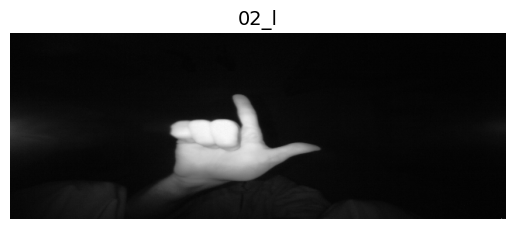

 25%|██▌       | 5/20 [00:00<00:01, 14.09it/s]

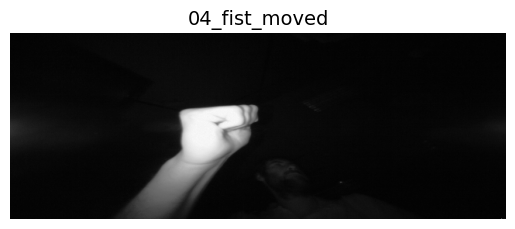

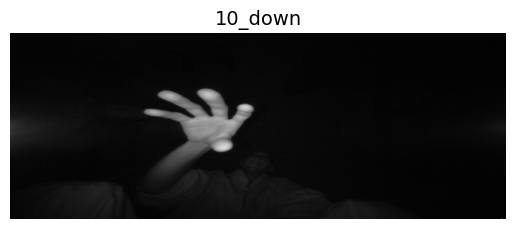

 35%|███▌      | 7/20 [00:00<00:01,  7.78it/s]

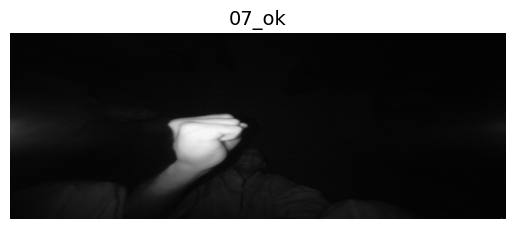

 45%|████▌     | 9/20 [00:01<00:01,  8.01it/s]

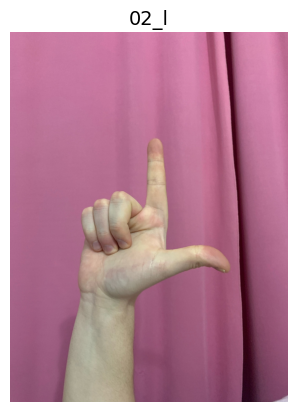

 55%|█████▌    | 11/20 [00:01<00:01,  4.63it/s]

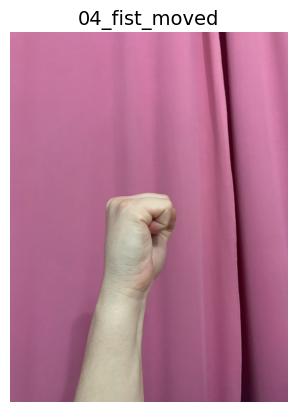

 60%|██████    | 12/20 [00:02<00:02,  3.27it/s]

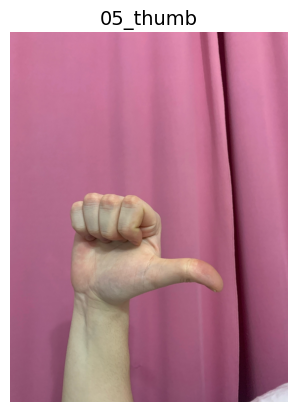

 65%|██████▌   | 13/20 [00:03<00:02,  2.58it/s]

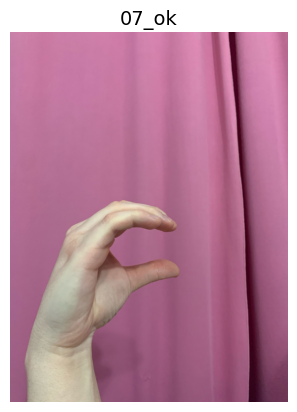

 70%|███████   | 14/20 [00:03<00:02,  2.21it/s]

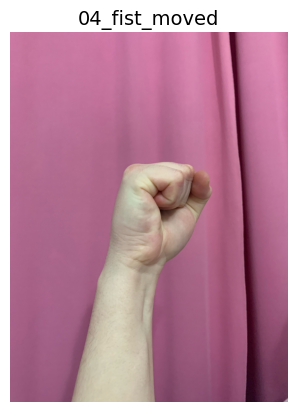

 75%|███████▌  | 15/20 [00:04<00:02,  1.98it/s]

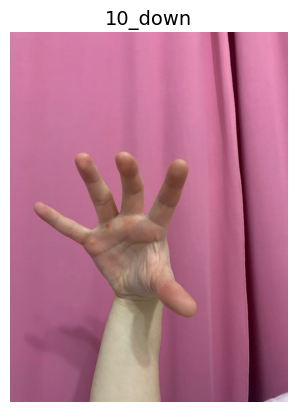

 80%|████████  | 16/20 [00:05<00:02,  1.82it/s]

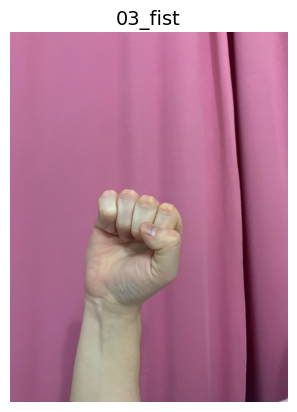

 85%|████████▌ | 17/20 [00:05<00:01,  1.69it/s]

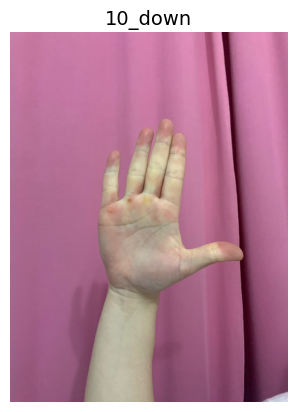

 90%|█████████ | 18/20 [00:06<00:01,  1.60it/s]

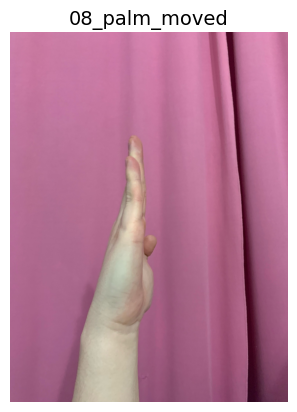

 95%|█████████▌| 19/20 [00:07<00:00,  1.54it/s]

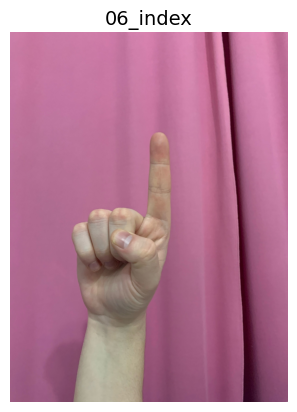

100%|██████████| 20/20 [00:08<00:00,  2.49it/s]


In [ ]:
import torch
import torchvision.transforms as tt
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Список меток для вашей задачи
labels = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

# Функция для обработки изображения и извлечения ландмарков
def land_image(image_path):
    # Чтение изображения с помощью OpenCV
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Преобразуем в RGB

    # Обработка изображения с Mediapipe
    results = hands.process(image_rgb)

    # Если найдены ландмарки для руки
    if results.multi_hand_landmarks:
        landmarks = []  # Создаем список для ландмарков

        # Извлечение координат ландмарков руки
        for landmark in results.multi_hand_landmarks[0].landmark:
            landmarks.append([landmark.x, landmark.y])  # Добавляем координаты в список

        # Преобразуем в numpy массив
        landmarks = np.array(landmarks)

        # Нормализуем координаты
        if np.max(landmarks[:, 0]) > np.min(landmarks[:, 0]):
            landmarks[:, 0] -= np.min(landmarks[:, 0])
            landmarks[:, 0] /= np.max(landmarks[:, 0])

        if np.max(landmarks[:, 1]) > np.min(landmarks[:, 1]):
            landmarks[:, 1] -= np.min(landmarks[:, 1])
            landmarks[:, 1] /= np.max(landmarks[:, 1])

        # Преобразуем в формат, подходящий для нейросети
        landmarks = torch.tensor(landmarks, dtype=torch.float32).unsqueeze(0)  # Добавляем размерность батча
        return landmarks

    return None  # Если ландмарки не найдены, возвращаем None

# Функция для предсказания на изображении
def predict_image(image_path, model, device):
    image = land_image(image_path)

    if image is None:
        return None  # Если ландмарки не были найдены, пропускаем изображение

    image = image.to(device)  # Перемещаем изображение на нужное устройство (CPU или GPU)

    # Предсказание
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        output = model(image)

    # Получаем предсказанный класс (индекс)
    _, predicted_class = torch.max(output, 1)

    # Получаем строковую метку с помощью списка labels
    predicted_label = labels[predicted_class.item()]
    return predicted_label

# Путь к распакованным изображениям
image_folder1 = '/content/extracted_images1/test'
image_folder2 = '/content/extracted_images2/test_2'

# Объединяем пути ко всем изображениям из обоих архивов
image_paths = []
image_paths.extend([os.path.join(image_folder1, fname) for fname in os.listdir(image_folder1) if fname.endswith('.jpg') or fname.endswith('.png')])
image_paths.extend([os.path.join(image_folder2, fname) for fname in os.listdir(image_folder2) if fname.endswith('.jpg') or fname.endswith('.png')])

# Предсказания для каждого изображения
predictions = []
for image_path in tqdm(image_paths):
    predicted_label = predict_image(image_path, model, device)
    if predicted_label is not None:
        predictions.append((image_path, predicted_label))

        # Отображаем изображение с предсказанным классом
        image = cv2.imread(image_path)  # Считываем изображение с помощью OpenCV
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Преобразуем в RGB для matplotlib

        plt.imshow(image_rgb)  # Отображаем изображение
        plt.title(predicted_label, fontsize=14)  # Заголовок с предсказанным классом
        plt.axis('off')  # Отключаем оси
        plt.show()  # Показываем изображение


In [ ]:
predicted_label

'06_index'

Checkpoint

In [ ]:
import cv2
import numpy as np
import torch
import mediapipe as mp
from ultralytics import YOLO

# Инициализация модели YOLO для обнаружения кистей
print("Загружаем модель YOLO...")
yolo_model = YOLO("yolov5s.pt")  # Используем предварительно обученную модель YOLOv5s

# Инициализация MediaPipe Hands для регрессии ключевых точек
print("Инициализируем MediaPipe Hands...")
mp_hands = mp.solutions.hands
hands_model = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

# Функция для обрезки изображения под bounding box
def crop_image(image, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    return image[y1:y2, x1:x2]

# Функция для рисования ключевых точек на изображении
def draw_keypoints(image, keypoints):
    for kp in keypoints:
        x, y = int(kp[0]), int(kp[1])
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

# Обработка изображения
image_path = "hand_example.jpg"  # Замените на путь к вашему изображению
image = cv2.imread(image_path)
if image is None:
    print("Ошибка загрузки изображения!")
    exit()

# YOLO: обнаружение bounding box кистей
print("Обнаружение кистей с помощью YOLO...")
results = yolo_model.predict(image)

# Проверяем, есть ли обнаруженные объекты
if len(results) == 0:
    print("Кисти не обнаружены.")
    exit()

# Итерация по всем обнаруженным bounding box
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box координаты
    for bbox in boxes:
        # Обрезаем изображение под bounding box
        cropped_hand = crop_image(image, bbox)

        # MediaPipe: регрессия ключевых точек
        print("Ищем ключевые точки с помощью MediaPipe...")
        rgb_cropped_hand = cv2.cvtColor(cropped_hand, cv2.COLOR_BGR2RGB)
        result = hands_model.process(rgb_cropped_hand)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                keypoints = []
                for landmark in hand_landmarks.landmark:
                    keypoints.append((landmark.x * cropped_hand.shape[1], landmark.y * cropped_hand.shape[0]))

                # Визуализация ключевых точек
                draw_keypoints(cropped_hand, keypoints)

                # Для демонстрации отображаем обрезанное изображение с ключевыми точками
                cv2.imshow("Keypoints", cropped_hand)
                cv2.waitKey(0)

# Очистка ресурсов
cv2.destroyAllWindows()

cheackpoint

In [ ]:
#Теперь попробуем обучать модели используя YOLO

In [ ]:
# Устанавливаем библиотеку Ultralytics
!pip install ultralytics


In [ ]:
from ultralytics import YOLO

from matplotlib import pyplot as plt
import cv2
# Загружаем предобученную модель YOLOv8
model = YOLO('yolov8n.pt')  # Замените на свой вес, если обучали отдельно

# Распознавание рук на изображении
# Обрабатываем изображение и получаем результаты
# Загружаем изображение и результаты
results = model('/content/Test 7.jpg', conf=0.25)[0]
results.save()


100%|██████████| 6.25M/6.25M [00:00<00:00, 46.9MB/s]


FileNotFoundError: /content/Test 7.jpg does not exist

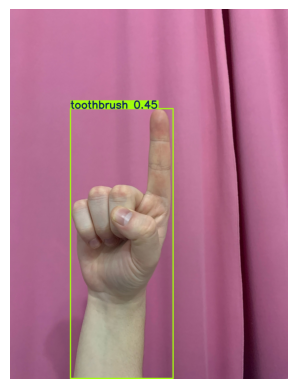

In [ ]:
image_path = '/content/results_Test 7.jpg'  # Путь может быть другим, если сохраняли в другой папке

# Чтение изображения
image = cv2.imread(image_path)

# Преобразование из BGR в RGB для matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Отображение изображения
plt.imshow(image_rgb)
plt.axis('off')  # Убираем оси
plt.show()

In [ ]:
!unzip -qq '/content/gdrive/MyDrive/NIR_dataset/HAGRID/ann_subsample'
!unzip -qq '/content/gdrive/MyDrive/NIR_dataset/HAGRID/subsample' -d '/content/subsample'

unzip:  cannot find or open /content/gdrive/MyDrive/NIR_dataset/HAGRID/ann_subsample, /content/gdrive/MyDrive/NIR_dataset/HAGRID/ann_subsample.zip or /content/gdrive/MyDrive/NIR_dataset/HAGRID/ann_subsample.ZIP.
unzip:  cannot find or open /content/gdrive/MyDrive/NIR_dataset/HAGRID/subsample, /content/gdrive/MyDrive/NIR_dataset/HAGRID/subsample.zip or /content/gdrive/MyDrive/NIR_dataset/HAGRID/subsample.ZIP.


In [ ]:
#Используем предобученную модель YOLO10

In [ ]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO

# Загрузка модели YOLOv10x
model = YOLO('/content/drive/MyDrive/NIR_dataset/YOLOv10x_gestures.pt')
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_r

In [ ]:
# Путь к изображению
img_path = '/content/Test 7.jpg'

# Инференс (детекция объектов)
results = model(img_path)[0]

# Визуализация результатов
results.show()

In [ ]:
# Получение bounding boxes, названий жестов и уверенности
boxes = results.boxes.xywh  # Все bounding boxes в формате (x, y, w, h)
names = results.names  # Словарь с именами классов (например, жестов)
confidences = results.boxes.conf  # Уверенность (confidence) для каждого предсказания (bounding box)

# Теперь вы можете извлечь данные о каждом предсказанном объекте
for i, box in enumerate(boxes):  # Обрабатываем каждый объект
    # Координаты bounding box (x, y, w, h)
    x, y, w, h = box
    # Имя жеста (если модель поддерживает ключевые точки жеста или другой лейбл)
    gesture_name = names[int(results.boxes.cls[i])]  # Получаем имя класса (жеста)
    # Уверенность (confidence) для текущего объекта
    confidence = confidences[i].item()  # Получаем уверенность для этого объекта

    print(f"Объект {i+1}:")
    print(f"  Координаты bounding box: {x}, {y}, {w}, {h}")
    print(f"  Название жеста: {gesture_name}")
    print(f"  Уверенность: {confidence:.2f}")

Объект 1:
  Координаты bounding box: 654.9551391601562, 1133.7652587890625, 620.2882080078125, 1134.21044921875
  Название жеста: one
  Уверенность: 0.90


In [ ]:
box

tensor([ 654.9551, 1133.7653,  620.2882, 1134.2104], device='cuda:0')

In [ ]:
# Загрузка модели YOLOv10x_hands
model_hand = YOLO('/content/drive/MyDrive/NIR_dataset/YOLOv10x_hands.pt')
model_hand

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_r

In [ ]:
# Путь к изображению
img_path = '/content/Test 10.jpg'

# Инференс (детекция объектов)
results = model_hand(img_path)[0]

# Визуализация результатов
results.show()

In [ ]:
results

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'grabbing', 1: 'grip', 2: 'holy', 3: 'right_holy', 4: 'left_holy', 5: 'point', 6: 'call', 7: 'three3', 8: 'timeout', 9: 'right_timeout', 10: 'left_timeout', 11: 'xsign', 12: 'left_xsign', 13: 'right_xsign', 14: 'hand_heart', 15: 'left_hand_heart', 16: 'right_hand_heart', 17: 'hand_heart2', 18: 'left_hand_heart2', 19: 'right_hand_heart2', 20: 'little_finger', 21: 'middle_finger', 22: 'take_picture', 23: 'left_take_picture', 24: 'right_take_picture', 25: 'dislike', 26: 'fist', 27: 'four', 28: 'like', 29: 'mute', 30: 'ok', 31: 'one', 32: 'palm', 33: 'peace', 34: 'peace_inverted', 35: 'rock', 36: 'stop', 37: 'stop_inverted', 38: 'three', 39: 'three2', 40: 'two_up', 41: 'two_up_inverted', 42: 'three_gun', 43: 'thumb_index', 44: 'thumb_index2', 45: 'left_thumb_index2', 46: 'right_thumb_index2', 47: 'no_gesture'}
obb: None
orig_img: array([[[170, 13

In [ ]:
# Загрузка модели YOLOv10x_hands
from ultralytics import YOLO
model_handn = YOLO('/content/drive/MyDrive/NIR_dataset/YOLOv10n_hands.pt')
model_handn

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
# Путь к изображению
img_path = '/content/frame_00_05_0127.png'

# Инференс (детекция объектов)
results = model_handn(img_path)[0]
if results.boxes:
    print("a")


image 1/1 /content/frame_00_05_0127.png: 256x640 (no detections), 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 640)


In [ ]:
if results.boxes:
    print("a")

a


In [ ]:
results.boxes.xywh

tensor([], device='cuda:0', size=(0, 4))

In [ ]:
results.keypoints

Для начала используем предобученную модель на жесты

['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

В нашем датасете
palm = 0; в yolo = 32;
l = 1 в yolo это 43;
fist = 2 в yolo 26;
fist_moved = 3 в yolo 26;





In [ ]:
X_train_data[0]

'/content/extracted_files/leapGestRecog/00/01_palm/frame_00_01_0196.png'


0: 640x640 1 grabbing, 1107.4ms
Speed: 6.9ms preprocess, 1107.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


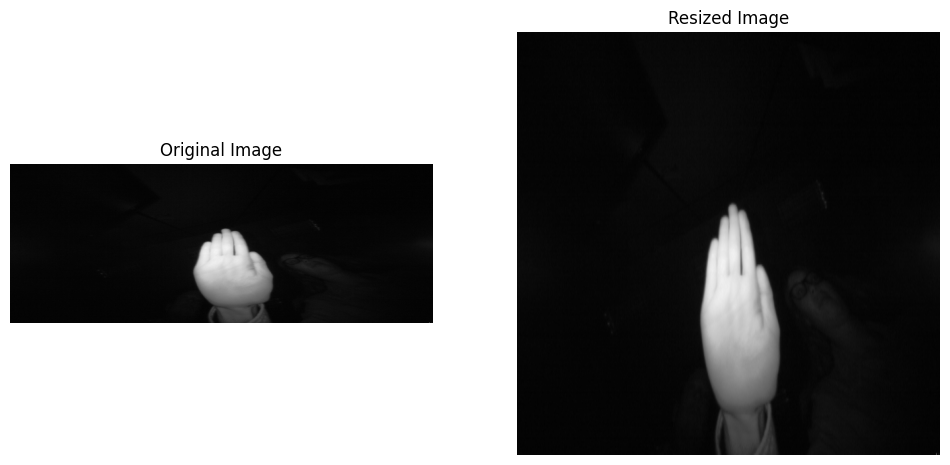

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/frame_00_01_0007.png')

# Изменение размера изображения
target_size = (640, 640)
image_resized = cv2.resize(image, target_size)

# Получение результатов с помощью модели
results = model_handn(image_resized)[0]

# Конвертация изображения из BGR в RGB для отображения с matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

# Показать оба изображения с помощью matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Оригинальное изображение
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Изображение после изменения размера и результат модели (если нужно)
axes[1].imshow(image_resized_rgb)
axes[1].set_title("Resized Image")
axes[1].axis('off')

# Отображение на экране
plt.show()


In [ ]:
X_train_data

NameError: name 'X_train_data' is not defined

In [ ]:
import cv2
from tqdm import tqdm

# Объединение данных для тренировки и теста
data = X_train_data + X_test_data
labels = y_train_data + y_test_data
bboxes_list = []  # Список для хранения меток жестов
image_path_list = []
labels_landmarks = []

# Размер, в который нужно привести изображения
target_size = (640, 640)

# Обработка всех изображений
for i in tqdm(range(len(labels))):
    # Чтение изображения
    image = cv2.imread(data[i])  # Чтение изображения с пути

    # Изменение размера изображения с (640, 240, 3) в (128, 128, 3)
    image_resized = cv2.resize(image, target_size)

    # Обработка изображения с помощью mediapipe
    results = model_handn(image_resized, verbose=False)[0]

    # Если найдены ландмарки для руки
    if results.boxes:
        bboxes_list.append(results.boxes.xywh[0].tolist())
        image_path_list.append(image_resized)
        labels_landmarks.append(labels[i])

print("Обработка изображений завершена.")


 49%|████▉     | 9832/20000 [56:34<18:49:09,  6.66s/it]

In [ ]:
bboxes_list[0]

In [ ]:
# Сохранение данных в JSON
data_to_save = {
    "bboxes_list": bboxes_list,
    "image_path_list": image_path_list,
    "labels_landmarks": labels_landmarks
}

with open("data.json", "w") as json_file:
    json.dump(data_to_save, json_file)
    print("Данные успешно сохранены в data.json")

In [ ]:
import os
from pathlib import Path

# Создание директорий для хранения аннотаций
os.makedirs("yolo_dataset/labels/train", exist_ok=True)
os.makedirs("yolo_dataset/labels/val", exist_ok=True)

# Функция для сохранения аннотаций
def save_yolo_annotations(image_paths, bboxes, labels, output_folder):
    for img_path, bbox, label in zip(image_paths, bboxes, labels):
        # Получаем имя файла изображения (без расширения)
        img_name = Path(img_path).stem
        label_file = os.path.join(output_folder, f"{img_name}.txt")

        # Записываем bbox в файл
        with open(label_file, "w") as f:
            # bbox уже в формате YOLO: [x_center, y_center, width, height]
            x_center, y_center, width, height = bbox
            f.write(f"{label} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")


In [ ]:
from sklearn.model_selection import train_test_split

# Разделяем данные на тренировочные и валидационные наборы
train_image_paths, val_image_paths, train_bboxes, val_bboxes, train_labels, val_labels = train_test_split(
    image_path_list, bboxes_list, labels_landmarks, test_size=0.2, random_state=42
)

# Сохраняем аннотации в YOLO-формате
save_yolo_annotations(train_image_paths, train_bboxes, train_labels, "yolo_dataset/labels/train")
save_yolo_annotations(val_image_paths, val_bboxes, val_labels, "yolo_dataset/labels/val")


In [ ]:
import shutil

# Создаем директории для изображений
os.makedirs("yolo_dataset/images/train", exist_ok=True)
os.makedirs("yolo_dataset/images/val", exist_ok=True)

# Копируем изображения
for img_path in train_image_paths:
    shutil.copy(img_path, "yolo_dataset/images/train/")

for img_path in val_image_paths:
    shutil.copy(img_path, "yolo_dataset/images/val/")


In [ ]:
import yaml

# Данные для файла
data = {
    "train": "yolo_dataset/images/train",
    "val": "yolo_dataset/images/val",
    "nc": 10,  # Количество классов (замените на ваше)
    "names": ['01_palm','02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']  # Замените на свои классы
}

# Сохранение в файл data.yaml
with open("data.yaml", "w") as file:
    yaml.dump(data, file, default_flow_style=False)

print("Файл data.yaml успешно создан!")


Файл data.yaml успешно создан!


In [ ]:
import cv2
import os
from tqdm import tqdm

def resize_images(input_dir, output_dir, target_size=(240, 240)):
    # Создаём директорию для сохранения обработанных изображений
    os.makedirs(output_dir, exist_ok=True)

    for file_name in tqdm(os.listdir(input_dir)):
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, file_name)

        # Проверяем, что это файл изображения
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            # Загружаем изображение
            img = cv2.imread(input_path)
            if img is not None:
                # Изменяем размер
                resized_img = cv2.resize(img, target_size)
                # Сохраняем обработанное изображение
                cv2.imwrite(output_path, resized_img)
            else:
                print(f"Ошибка загрузки {input_path}")

# Путь к тренировочным изображениям
input_dir_train = "/content/yolo_dataset/images/train"
output_dir_train = "/content/yolo_dataset/images_resized/train"

# Изменяем размеры тренировочных изображений
resize_images(input_dir_train, output_dir_train, target_size=(240, 240))

print(f"Изображения были преобразованы и сохранены в {output_dir_train}")


 59%|█████▊    | 7261/12386 [00:43<00:24, 207.48it/s]

In [ ]:
from ultralytics import YOLO

# Загрузка модели
model = YOLO("yolov8n.pt")  # Используем предобученную модель

# Обучение
results = model.train(
    data="data.yaml",  # Ваш файл конфигурации
    epochs=50,         # Количество эпох
    batch=16,          # Размер батча
    imgsz=128,         # Размер изображений
    verbose=True       # Показывать вывод
)

# Доступ к данным о потерях и метриках после обучения
for epoch, metrics in enumerate(results):
    print(f"Эпоха {epoch + 1}:")
    print(f"  - Train Loss: {metrics['train/loss']}")
    print(f"  - Val Loss: {metrics['val/loss']}")
    print(f"  - Precision: {metrics['metrics/precision']}")
    print(f"  - Recall: {metrics['metrics/recall']}")
    print(f"  - mAP@0.5: {metrics['metrics/mAP50']}")
    print(f"  - mAP@0.5:0.95: {metrics['metrics/mAP50-95']}")


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /content/yolo_dataset/labels/train.cache... 12386 images, 0 backgrounds, 12386 corrupt: 100%|██████████| 12386/12386 [00:00<?, ?it/s]

Выходные данные были обрезаны до нескольких последних строк (5000).
train: WARNING ⚠️ /content/yolo_dataset/images/train/frame_05_09_0074.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     348.96      133.84      131.79       84.75]
train: WARNING ⚠️ /content/yolo_dataset/images/train/frame_05_09_0076.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      343.4      134.27      120.82      82.348]
train: WARNING ⚠️ /content/yolo_dataset/images/train/frame_05_09_0077.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      278.4      140.06      132.44       88.37]
train: WARNING ⚠️ /content/yolo_dataset/images/train/frame_05_09_0078.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     348.79      133.87      130.69      83.288]
train: WARNING ⚠️ /content/yolo_dataset/images/train/frame_05_09_0081.png: ignoring corrupt image/label: non-normalized or out of bounds

ValueError: not enough values to unpack (expected 3, got 0)

In [ ]:
int(results.boxes.cls[i])

0

In [ ]:
im = cv2.imread('/content/yolo_dataset/images/train/frame_00_01_0001.png')
im.shape

(240, 640, 3)

In [ ]:
print("X_train_data:", X_train_data[:5])
print("y_train_data:", y_train_data[:5])


X_train_data: ['/content/extracted_files/leapGestRecog/00/01_palm/frame_00_01_0037.png', '/content/extracted_files/leapGestRecog/00/01_palm/frame_00_01_0096.png', '/content/extracted_files/leapGestRecog/00/01_palm/frame_00_01_0070.png', '/content/extracted_files/leapGestRecog/00/01_palm/frame_00_01_0043.png', '/content/extracted_files/leapGestRecog/00/01_palm/frame_00_01_0142.png']
y_train_data: [1, 1, 1, 1, 1]


In [ ]:
# Указание значения по умолчанию для `size` и `train`, если они не нужны
train_dataset = Dataset_gest(X_train_data, y_train_data, size=(128, 128), train=True)
test_dataset = Dataset_gest(X_test_data, y_test_data, size=(128, 128), train=False)
batch = 16
train_loader = DataLoader(train_dataset, batch, shuffle=True)
test_loader= DataLoader(test_dataset, batch, shuffle=False)

Обучение YOLO 8

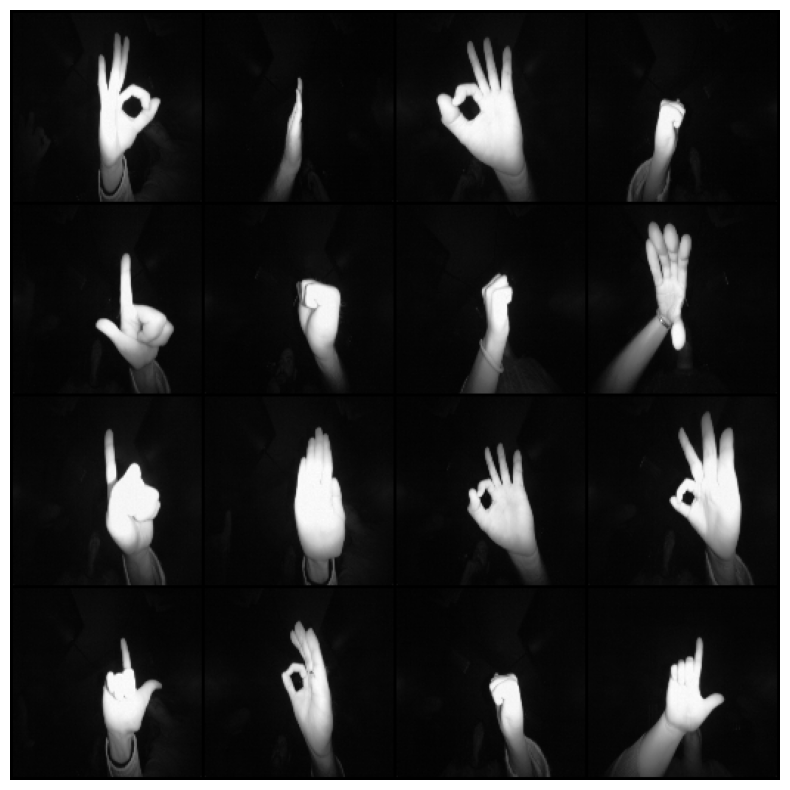

In [ ]:
show_batch(train_loader, 16)

In [ ]:
from sklearn.metrics import f1_score

# Оценка модели на тестовом даталоадере
test_loss = 0
test_acc = 0
test_f1 = 0

criterion = torch.nn.CrossEntropyLoss()  # Убедитесь, что это та же функция потерь, которая использовалась при обучении

model.eval()  # Перевод модели в режим инференса
with torch.no_grad():  # Отключение вычислений градиентов
    for image, labels in test_loader:
        landmarks = landmarks.to(device)
        labels = labels.to(device)
        output = model(image)

        # Подсчёт точности

        test_acc += (output.argmax(dim=1) == labels).sum().item() / len(labels)

        # Подсчёт F1-метрики
        test_f1 += f1_score(
            labels.detach().cpu().numpy().astype(int),
            (output.detach().cpu().numpy().argmax(1)).astype(int),
            average='weighted'
        )

# Средние значения для всего тестового набора
test_loss /= len(test_loader)
test_acc /= len(test_loader)
test_f1 /= len(test_loader)

print(f"Test Loss: {test_loss:.6f} | Test Accuracy: {test_acc:.6f} | Test F1: {test_f1:.6f}")


Cheackpoint 18.01.25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

 Airlines.csv				  neo.csv
'Colab Notebooks'			  NIR_Ivanov_MA
 data1.csv				  Untitled1.ipynb
 Grafiki.ipynb				  Визуализация_Графиков_ИвановаТА.ipynb
 MetodyG_IvanovaTA23092024.ipynb	 'Гипотезы для теста.ipynb'
'MetodyGruppirovki_IvanovaTA (1).ipynb'   ГРафикиитог.ipynb
 MetodyGruppirovki_IvanovaTA.ipynb	 'проверка_гипотез (1).ipynb'


In [3]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/NIR_Ivanov_MA/yolo_dataset_corr.zip'

extract_path = '/content/yolo_dataset'

if os.path.exists(zip_path):
    print("Файл найден. Извлекаем...")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print("Файлы успешно извлечены в:", extract_path)
else:
    print("Файл не найден. Проверьте путь к файлу.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Файл найден. Извлекаем...
Файлы успешно извлечены в: /content/yolo_dataset


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 51.1 MB/s eta 0:00:00


In [5]:
import yaml

# Данные для файла
data = {
    "train": '/content/yolo_dataset/yolo_dataset_corr/images/train',
    "val": '/content/yolo_dataset/yolo_dataset_corr/images/val',
    "nc": 10,  # Количество классов (замените на ваше)
    "names": ['0','1','2','3','4','5','6','7','8','9']  # Замените на свои классы
}

# Сохранение в файл data.yaml
with open("data.yaml", "w") as file:
    yaml.dump(data, file, default_flow_style=False)

print("Файл data.yaml успешно создан!")


Файл data.yaml успешно создан!


In [6]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [7]:
import torch
print(torch.cuda.is_available())

True


In [8]:
import os

def adjust_labels(directory, num_classes=10):
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):  # Открываем только файлы с метками (.txt)
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as f:
                lines = f.readlines()

            # Создаем новый список для измененных меток
            adjusted_lines = []

            for line in lines:
                parts = line.split()
                class_id = int(parts[0])  # Индекс класса
                if class_id > 0:  # Если класс больше 0, уменьшаем на 1
                    parts[0] = str(class_id - 1)
                else:
                    print(f"Предупреждение: Индекс класса не может быть меньше 0 в файле {filename}")
                adjusted_lines.append(" ".join(parts) + "\n")

            # Перезаписываем файл с новыми метками
            with open(filepath, 'w') as f:
                f.writelines(adjusted_lines)

# Применение скрипта к меткам
train_labels_dir = '/content/yolo_dataset/yolo_dataset_corr/labels/train'
val_labels_dir = '/content/yolo_dataset/yolo_dataset_corr/labels/val'

adjust_labels(train_labels_dir)
adjust_labels(val_labels_dir)

print("Все метки были уменьшены на 1.")


Все метки были уменьшены на 1.


In [ ]:
from ultralytics import YOLO

# Загрузка модели
model = YOLO("yolov8n.pt")  # Используем предобученную модель

# Обучение
results = model.train(
    data="data.yaml",  # Ваш файл конфигурации
    epochs=20,         # Количество эпох
    batch=16,          # Размер батча
    imgsz=640,         # Размер изображений
    verbose=True       # Показывать вывод
)

# Доступ к данным о потерях и метриках после обучения
for epoch, metrics in enumerate(results):
    print(f"Эпоха {epoch + 1}:")
    print(f"  - Train Loss: {metrics['train/loss']}")
    print(f"  - Val Loss: {metrics['val/loss']}")
    print(f"  - Precision: {metrics['metrics/precision']}")
    print(f"  - Recall: {metrics['metrics/recall']}")
    print(f"  - mAP@0.5: {metrics['metrics/mAP50']}")
    print(f"  - mAP@0.5:0.95: {metrics['metrics/mAP50-95']}")


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /content/yolo_dataset/yolo_dataset_corr/labels/train.cache... 15291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15291/15291 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolo_dataset/yolo_dataset_corr/labels/val.cache... 3823 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3823/3823 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.17G       1.65      3.121      1.825         21        640: 100%|██████████| 956/956 [07:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:47<00:00,  2.55it/s]

                   all       3823       3823      0.859      0.861      0.902      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.09G      1.216      1.583       1.42         18        640: 100%|██████████| 956/956 [06:44<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.68it/s]


                   all       3823       3823      0.924      0.927      0.957      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.08G        1.1      1.264      1.335         24        640: 100%|██████████| 956/956 [06:36<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.67it/s]


                   all       3823       3823      0.965      0.926      0.969      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.08G      1.011      1.089      1.271         16        640: 100%|██████████| 956/956 [06:37<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:45<00:00,  2.66it/s]


                   all       3823       3823      0.954      0.949      0.975      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.08G     0.9301     0.9659      1.218         13        640: 100%|██████████| 956/956 [06:44<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:41<00:00,  2.90it/s]


                   all       3823       3823      0.969      0.967      0.977      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.08G     0.8684     0.8829       1.18         20        640: 100%|██████████| 956/956 [06:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:47<00:00,  2.52it/s]

                   all       3823       3823      0.967      0.961      0.981      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.08G     0.8264     0.8349      1.159         20        640: 100%|██████████| 956/956 [06:36<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:40<00:00,  2.95it/s]


                   all       3823       3823      0.968      0.976      0.984      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.08G     0.7867     0.7989      1.138         20        640: 100%|██████████| 956/956 [06:43<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:43<00:00,  2.79it/s]


                   all       3823       3823      0.969      0.958      0.981      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.07G     0.7507     0.7493      1.118         20        640: 100%|██████████| 956/956 [06:46<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:43<00:00,  2.76it/s]


                   all       3823       3823      0.971      0.974      0.983      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.08G     0.7235     0.7168      1.102         21        640: 100%|██████████| 956/956 [06:37<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.68it/s]

                   all       3823       3823      0.971      0.977      0.985      0.912


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.07G      0.468     0.3379     0.9684         11        640: 100%|██████████| 956/956 [06:20<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:42<00:00,  2.84it/s]


                   all       3823       3823      0.973      0.979      0.985       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.07G     0.4219     0.3034     0.9465         11        640: 100%|██████████| 956/956 [06:19<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.69it/s]

                   all       3823       3823      0.968      0.975      0.982      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.07G     0.3942     0.2862     0.9303         11        640: 100%|██████████| 956/956 [06:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.70it/s]


                   all       3823       3823      0.978      0.976      0.987      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.07G     0.3675     0.2705     0.9183         11        640: 100%|██████████| 956/956 [06:17<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:43<00:00,  2.73it/s]


                   all       3823       3823      0.981      0.979      0.988      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.07G      0.346     0.2547     0.9089         11        640: 100%|██████████| 956/956 [06:17<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.69it/s]

                   all       3823       3823      0.977       0.98      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.07G     0.3266     0.2404     0.8996         11        640: 100%|██████████| 956/956 [06:23<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.70it/s]


                   all       3823       3823       0.98      0.976      0.988      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.07G      0.309       0.23     0.8918         11        640: 100%|██████████| 956/956 [06:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.72it/s]

                   all       3823       3823      0.981      0.977      0.988      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.07G     0.2905     0.2193     0.8842         11        640: 100%|██████████| 956/956 [06:22<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.70it/s]

                   all       3823       3823      0.978      0.978      0.989      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.07G     0.2746     0.2114     0.8781         11        640: 100%|██████████| 956/956 [06:21<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:41<00:00,  2.89it/s]

                   all       3823       3823       0.98      0.981       0.99      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.07G       0.26     0.2001     0.8743         11        640: 100%|██████████| 956/956 [06:19<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:43<00:00,  2.77it/s]


                   all       3823       3823      0.978      0.981       0.99      0.966

20 epochs completed in 2.430 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:47<00:00,  2.55it/s]


                   all       3823       3823      0.979      0.981       0.99      0.966
                     0        423        423      0.989      0.995      0.995      0.987
                     1        393        393      0.968      0.977      0.994      0.982
                     2        378        378       0.99      0.992      0.995      0.993
                     3        376        376      0.984      0.992      0.993      0.945
                     4        347        347      0.998          1      0.995      0.994
                     5        378        378      0.995      0.997      0.995      0.988
                     6        404        404      0.999          1      0.995      0.992
                     7        354        354      0.956      0.952      0.969      0.912
                     8        373        373      0.914      0.909       0.97      0.884
                     9        397        397      0.994      0.997      0.995      0.982
Speed: 0.3ms preproce

TypeError: 'DetMetrics' object is not iterable

In [9]:
from ultralytics import YOLO

# Загрузка модели
model = YOLO("yolov8n.pt")  # Используем предобученную модель

# Обучение
results = model.train(
    data="data.yaml",  # Ваш файл конфигурации
    epochs=20,         # Количество эпох
    batch=16,          # Размер батча
    imgsz=640,         # Размер изображений
    verbose=True       # Показывать вывод
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 208MB/s]

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

100%|██████████| 755k/755k [00:00<00:00, 75.1MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 254MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_dataset/yolo_dataset_corr/labels/train... 15291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15291/15291 [00:11<00:00, 1339.29it/s]


train: New cache created: /content/yolo_dataset/yolo_dataset_corr/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/yolo_dataset/yolo_dataset_corr/labels/val... 3823 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3823/3823 [00:02<00:00, 1493.67it/s]


val: New cache created: /content/yolo_dataset/yolo_dataset_corr/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.18G       1.65      3.121      1.825         21        640: 100%|██████████| 956/956 [08:10<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:51<00:00,  2.34it/s]


                   all       3823       3823      0.859      0.861      0.902      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.17G      1.216      1.583       1.42         18        640: 100%|██████████| 956/956 [07:32<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:55<00:00,  2.15it/s]


                   all       3823       3823      0.924      0.927      0.957      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.17G        1.1      1.264      1.335         24        640: 100%|██████████| 956/956 [07:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:46<00:00,  2.61it/s]


                   all       3823       3823      0.965      0.926      0.969      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.17G      1.011      1.089      1.271         16        640: 100%|██████████| 956/956 [07:09<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]


                   all       3823       3823      0.954      0.949      0.975      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.17G     0.9301     0.9659      1.218         13        640: 100%|██████████| 956/956 [07:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]


                   all       3823       3823      0.969      0.967      0.977      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.17G     0.8684     0.8829       1.18         20        640: 100%|██████████| 956/956 [07:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:45<00:00,  2.64it/s]

                   all       3823       3823      0.967      0.961      0.981      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.17G     0.8264     0.8349      1.159         20        640: 100%|██████████| 956/956 [07:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:44<00:00,  2.68it/s]


                   all       3823       3823      0.968      0.976      0.984      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.17G     0.7867     0.7989      1.138         20        640: 100%|██████████| 956/956 [07:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:45<00:00,  2.66it/s]

                   all       3823       3823      0.969      0.958      0.981      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.17G     0.7507     0.7493      1.118         20        640: 100%|██████████| 956/956 [07:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]


                   all       3823       3823      0.971      0.974      0.983      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.17G     0.7235     0.7168      1.102         21        640: 100%|██████████| 956/956 [07:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]

                   all       3823       3823      0.971      0.977      0.985      0.912


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.17G      0.468     0.3379     0.9684         11        640: 100%|██████████| 956/956 [07:07<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:46<00:00,  2.58it/s]

                   all       3823       3823      0.973      0.979      0.985       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.17G     0.4219     0.3034     0.9465         11        640: 100%|██████████| 956/956 [07:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:46<00:00,  2.57it/s]

                   all       3823       3823      0.968      0.975      0.982      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.17G     0.3942     0.2862     0.9303         11        640: 100%|██████████| 956/956 [07:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]


                   all       3823       3823      0.978      0.976      0.987      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.17G     0.3675     0.2705     0.9183         11        640: 100%|██████████| 956/956 [07:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]

                   all       3823       3823      0.981      0.979      0.988      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.17G      0.346     0.2547     0.9089         11        640: 100%|██████████| 956/956 [07:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]

                   all       3823       3823      0.977       0.98      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.17G     0.3266     0.2404     0.8996         11        640: 100%|██████████| 956/956 [06:59<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:53<00:00,  2.26it/s]

                   all       3823       3823       0.98      0.976      0.988      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.17G      0.309       0.23     0.8918         11        640: 100%|██████████| 956/956 [07:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:50<00:00,  2.37it/s]

                   all       3823       3823      0.981      0.977      0.988      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.17G     0.2905     0.2193     0.8842         11        640: 100%|██████████| 956/956 [06:56<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:54<00:00,  2.19it/s]


                   all       3823       3823      0.978      0.978      0.989      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.17G     0.2746     0.2114     0.8781         11        640: 100%|██████████| 956/956 [06:55<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:53<00:00,  2.25it/s]

                   all       3823       3823       0.98      0.981       0.99      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.17G       0.26     0.2001     0.8743         11        640: 100%|██████████| 956/956 [06:49<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:57<00:00,  2.08it/s]


                   all       3823       3823      0.978      0.981       0.99      0.966

20 epochs completed in 2.663 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:52<00:00,  2.31it/s]


                   all       3823       3823      0.979      0.981       0.99      0.966
                     0        423        423      0.989      0.995      0.995      0.987
                     1        393        393      0.968      0.977      0.994      0.982
                     2        378        378       0.99      0.992      0.995      0.993
                     3        376        376      0.984      0.992      0.994      0.945
                     4        347        347      0.998          1      0.995      0.994
                     5        378        378      0.995      0.997      0.995      0.988
                     6        404        404      0.999          1      0.995      0.992
                     7        354        354      0.956      0.952      0.969      0.912
                     8        373        373      0.913      0.906       0.97      0.884
                     9        397        397      0.994      0.997      0.995      0.982
Speed: 0.3ms preproce

In [11]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a31e13f1310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [13]:
from google.colab import files

# Укажите путь к файлу весов
weights_path = "runs/detect/train/weights/best.pt"

# Скачивание файла
files.download(weights_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>